<a href="https://colab.research.google.com/github/krishgit042023/House-price-Prediction/blob/main/Bengaluru_house_price_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset= pd.read_csv('/content/Bengaluru_House_Data.csv')
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
dataset.shape

(13320, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# prompt: value count of all columns

for col in dataset.columns:
    print(dataset[col].value_counts())
    print("-" * 20)


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
--------------------
size
2 BHK    

In [ ]:
# prompt: check for null values

print(dataset.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [ ]:
# prompt: drop  area_type , availability, society, balcony  columns

dataset.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns', inplace=True)

dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
dataset.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [ ]:
dataset.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
# prompt: value count on location

print(dataset['location'].value_counts())


location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64


In [ ]:
# prompt: one null value is present in location column , fill it with Sarjapur  Road

dataset['location'] = dataset['location'].fillna('Sarjapur  Road')
print(dataset.isnull().sum())


location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64


In [ ]:
# prompt: replace the null values in size column by 2bhk

dataset['size'] = dataset['size'].fillna('2 BHK')
print(dataset.isnull().sum())

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64


In [ ]:
# prompt: replace the null values in bath column by their mean

dataset['bath'] = dataset['bath'].fillna(dataset['bath'].mean())
print(dataset.isnull().sum())

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


In [ ]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
# prompt: in size column convert the bedrooms terms into bhk

# Convert 'size' column to 'bhk'
dataset['bhk'] = dataset['size'].str.split().str.get(0).astype(int)
dataset.drop('size', axis='columns', inplace=True)

dataset.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
# prompt: value count on total_sqft

dataset['total_sqft'].value_counts()

,count
total_sqft,
1200,843
1100,221
1500,205
2400,196
600,180
...,...
3580,1
2461,1
1437,1


In [ ]:
# prompt: unique in total_sqft column

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

dataset['total_sqft'] = dataset['total_sqft'].apply(convert_sqft_to_num)
dataset.head()

print(dataset.loc[30])

dataset.isnull().sum()

dataset = dataset.dropna()
dataset.isnull().sum()

dataset['price_per_sqft'] = dataset['price'] * 100000 / dataset['total_sqft']
dataset.head()

print(len(dataset['location'].unique()))

location_stats = dataset.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

len(location_stats[location_stats <= 10])

location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

dataset.location = dataset.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(dataset.location.unique())

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object
1299


<ipython-input-21-0326ef457675>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_per_sqft'] = dataset['price'] * 100000 / dataset['total_sqft']


241

In [ ]:
dataset['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
dataset.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.691168,112.453654,2.801718,7.907501e+03
std,1238.405258,1.335180,149.070368,1.291591,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
# prompt: in location column , the locations which are coming less than 11 times , put them in other section

location_stats_less_than_10 = location_stats[location_stats <= 10]
dataset.location = dataset.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


# To verify the changes:
print(dataset.location.value_counts())

location
other                        2891
Whitefield                    538
Sarjapur  Road                400
Electronic City               302
Kanakpura Road                271
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: count, Length: 241, dtype: int64


In [ ]:
# prompt: places where ((total_sqft/bhk) <300) , remove that flats

dataset = dataset[~(dataset.total_sqft/dataset.bhk<300)]

In [ ]:
dataset.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.563572,111.382401,2.650838,6303.979357
std,1261.271296,1.077132,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [ ]:
# prompt: remove the outliers from all the columns

# Continue from the provided code

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

dataset = remove_pps_outliers(dataset)
dataset.describe()

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

dataset = remove_bhk_outliers(dataset)
dataset.shape

dataset.describe()





,total_sqft,bath,price,bhk,price_per_sqft
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1496.289162,2.449218,99.016797,2.498913,6123.967526
std,865.812630,1.012328,93.373008,0.927014,2412.326430
min,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,1095.000000,2.000000,50.000000,2.000000,4594.530852
50%,1259.000000,2.000000,73.000000,2.000000,5681.305845
75%,1680.000000,3.000000,113.000000,3.000000,6896.551724
max,30000.000000,16.000000,2200.000000,16.000000,24509.803922


In [ ]:
dataset.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[' Devarachikkanahalli' 1250.0 2.0 40.0 2]
 [' Devarachikkanahalli' 1200.0 2.0 83.0 2]
 [' Devarachikkanahalli' 1170.0 2.0 40.0 2]
 ...
 ['other' 1353.0 2.0 110.0 2]
 ['other' 812.0 1.0 26.0 1]
 ['other' 3600.0 5.0 400.0 4]]


In [ ]:
print(y)

[ 3200.          6916.66666667  3418.8034188  ...  8130.08130081
  3201.97044335 11111.11111111]


In [ ]:
# prompt: applying one hot encoding in location column

import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'dataset' is your Pandas DataFrame
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Create a new variable to store the transformed data
X_encoded = np.array(ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough').fit_transform(X))

# Now, X_encoded contains the transformed data, while X remains the original data.

In [ ]:
print(X_encoded)

  (0, 0)	1.0
  (0, 241)	1250.0
  (0, 242)	2.0
  (0, 243)	40.0
  (0, 244)	2.0
  (1, 0)	1.0
  (1, 241)	1200.0
  (1, 242)	2.0
  (1, 243)	83.0
  (1, 244)	2.0
  (2, 0)	1.0
  (2, 241)	1170.0
  (2, 242)	2.0
  (2, 243)	40.0
  (2, 244)	2.0
  (3, 0)	1.0
  (3, 241)	1425.0
  (3, 242)	2.0
  (3, 243)	65.0
  (3, 244)	3.0
  (4, 0)	1.0
  (4, 241)	947.0
  (4, 242)	2.0
  (4, 243)	43.0
  (4, 244)	2.0
  :	:
  (7355, 240)	1.0
  (7355, 241)	1200.0
  (7355, 242)	2.0
  (7355, 243)	70.0
  (7355, 244)	2.0
  (7356, 240)	1.0
  (7356, 241)	1800.0
  (7356, 242)	1.0
  (7356, 243)	200.0
  (7356, 244)	1.0
  (7357, 240)	1.0
  (7357, 241)	1353.0
  (7357, 242)	2.0
  (7357, 243)	110.0
  (7357, 244)	2.0
  (7358, 240)	1.0
  (7358, 241)	812.0
  (7358, 242)	1.0
  (7358, 243)	26.0
  (7358, 244)	1.0
  (7359, 240)	1.0
  (7359, 241)	3600.0
  (7359, 242)	5.0
  (7359, 243)	400.0
  (7359, 244)	4.0


In [ ]:
# prompt: applying one hot encoding in location column

import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Assuming 'dataset' is your Pandas DataFrame
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Create a ColumnTransformer with OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# Fit and transform the data
X_encoded = ct.fit_transform(X)

# Convert the sparse matrix to a dense array
X_encoded = X_encoded.toarray() # Convert to dense NumPy array if it's sparse


# Now, X_encoded contains the transformed data, while X remains the original data.

# prompt: split the data into train set and test set

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

In [ ]:
# prompt: apply random forest

from sklearn.ensemble import RandomForestRegressor


# Split the data into training and testing sets (assuming X_encoded and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0) # You can adjust n_estimators

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
print(r2_score(y_test, y_pred))

0.9816924041487529


In [ ]:
print(y_pred)

[7931.14721781 5506.18770984 4815.90890797 ... 5118.39133994 5480.77591933
 7978.45690176]


In [ ]:
print(y_test)

[7954.54545455 5500.         4789.97789241 ... 5088.93280632 5479.45205479
 7936.50793651]


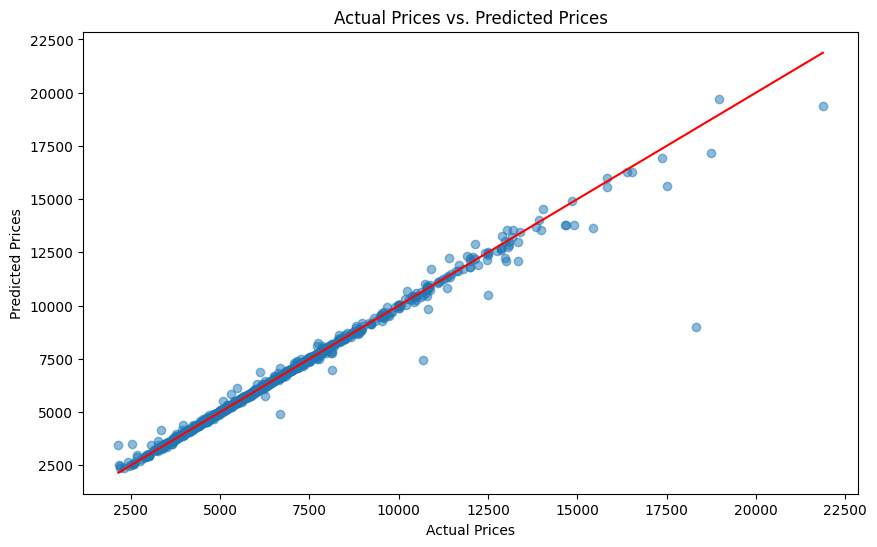

In [ ]:
# prompt: visualize the training dataset result

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from your previous code
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot the actual vs. predicted values
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-') # Add a diagonal line
plt.show()

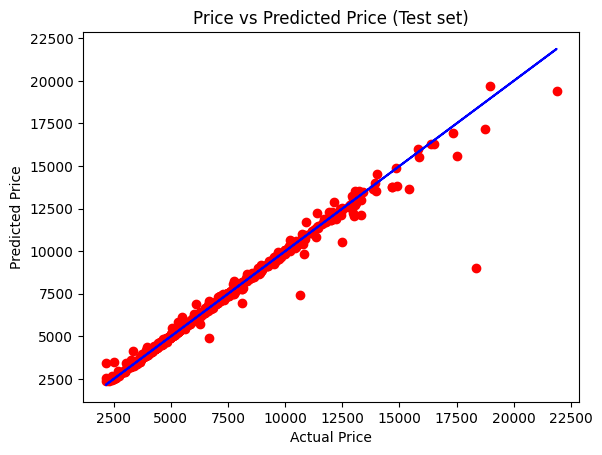

In [ ]:
# prompt: visualize the test set result

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

# Visualising the Test set results
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(y_test, y_test, color = 'blue') # This creates a diagonal line for perfect prediction
plt.title('Price vs Predicted Price (Test set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()